In [119]:
import os
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, set_link_color_palette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sep = '/'
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='#f2efef'

In [44]:
fr_thresh = 4.5
ISI_thresh = 0.55
recording = r'F:\CIT_WAY\csvs'
filename = 'neuron_stats.csv'

In [45]:
df = pd.read_csv(os.sep.join([recording, filename]))
df.index.name = 'Cluster_ID'
df = df[pd.notnull(df['SW_troff'])]

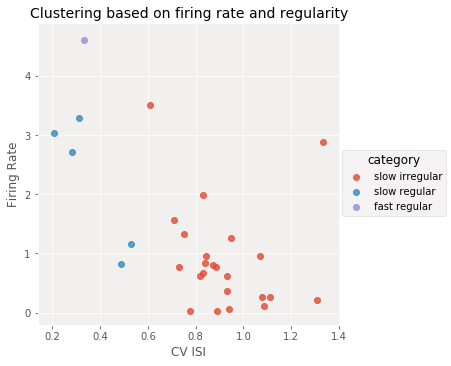

In [120]:
sns.lmplot(data=df, x='CV ISI', y='Firing Rate', fit_reg=False, hue='category')
plt.title('Clustering based on firing rate and regularity', fontsize=14)
plt.show()

### Dendrogram

In [47]:
scale = StandardScaler()
scaled_data = scale.fit_transform(df[['CV ISI', 'Firing Rate']])
data_for_dendrogram = linkage(scaled_data)

In [48]:
distance = 1.25
path = r'C:\Users\ASUS\Desktop\Images'

['#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#ee4035', '#0392cf', '#0392cf', '#0392cf', '#0392cf', '#7bc043', '#7bc043']


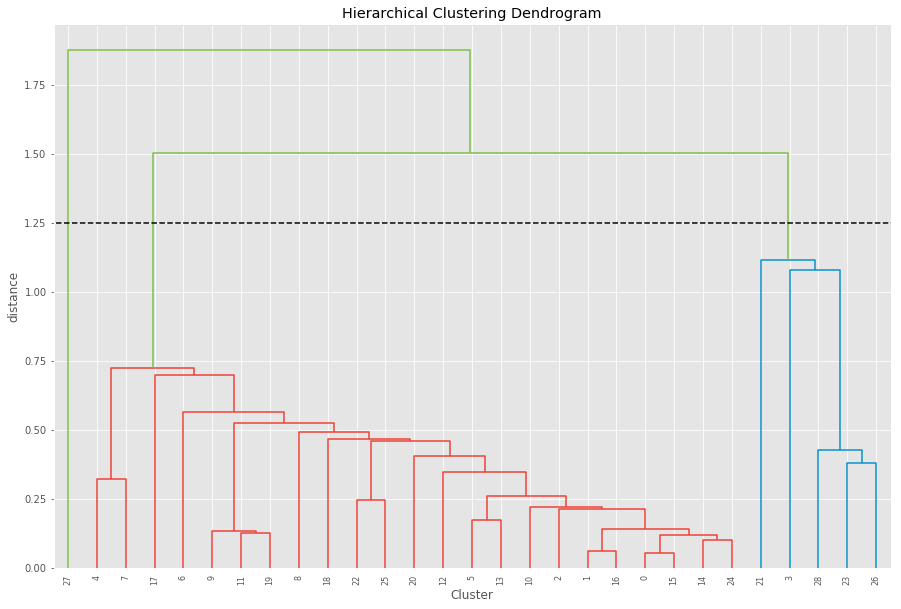

In [49]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
set_link_color_palette(['#ee4035','#0392cf'])
dn = dendrogram(
    data_for_dendrogram,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=1.2,
    above_threshold_color='#7bc043'
)
print(dn['color_list'])
line_y = np.ones(df.shape[0]*30) * distance
line_x = np.linspace(1, df.shape[0]*60, df.shape[0]*30)
plt.plot(line_x, line_y, linestyle='--', color='k')
plt.xlabel('Cluster')
plt.savefig(os.sep.join([path, 'Dendrogram', 'Dendrogram.png']), dpi=300)

In [53]:
distance = distance
clusters = fcluster(data_for_dendrogram, distance, criterion='distance')
df['clusters']=clusters

In [54]:
def map_color(df):
    if df == 1:
        return '#ee4035'
    elif df == 2:
        return '#0392cf'
    else:
        return '#7bc043'

df['colors']=df['clusters'].apply(map_color)

In [57]:
def generate_name_tag(df):
    return str(df['spike_cluster']) + ' Recording: ' +df['recording']

df['name tag'] = df.apply(generate_name_tag, axis=1)

In [58]:
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

trace = go.Scatter(
    x = df['CV ISI'],
    y = df['Firing Rate'],
    mode = 'markers',
    text = df['name tag']
)

layout= go.Layout(
    title= 'Scatterplot of CV ISI vs Firing Rate',
    autosize=False,
    width=700,
    height=700,
    hovermode= 'closest',
    xaxis= dict(
        title= 'CV ISI',
        ticklen= 5,
        zeroline= False,
        gridwidth= 1,
    ),
    yaxis=dict(
        title='Firing Rate',
        ticklen=5,
        gridwidth=1,
    ),
    showlegend=False
)

data = [trace]
fig = go.Figure(data=data, layout=layout)

# Plot and embed in ipython notebook!
plotly.offline.iplot(fig)

In [111]:
summary_table = df.groupby('clusters').describe().loc[:,(slice(None), ['count', 'mean', 'std'])].transpose()
summary_table.columns = ['Slow irregular',
                                                         'Slow regular',
                                                         'Faster irregular']
summary_table.loc[['CV ISI', 'Firing Rate', 'SW_return'], :].apply(np.round, decimals=3)

Slow irregular  Slow regular  Faster irregular
CV ISI      count          23.000         5.000             1.000
            mean            0.878         0.349             1.334
            std             0.183         0.153               NaN
Firing Rate count          23.000         5.000             1.000
            mean            0.716         3.437             2.894
            std             0.519         0.722               NaN
SW_return   count          23.000         5.000             1.000
            mean            0.696         0.747             0.500
            std             0.193         0.189               NaN

In [71]:
df[df['category'] == 'slow irregular'].sort_values(by='base_min_amp')

,spike_cluster,CV ISI,Firing Rate,recording,SW_peak,SW_return,SW_troff,base_min_amp,min_max_amp,spike_type,category,clusters,colors,name tag
Cluster_ID,,,,,,,,,,,,,,
10,27,0.930436,0.363246,2018-05-01_01,NaN,0.700000,0.366667,137.477245,NaN,down_up,slow irregular,1,#ee4035,27 Recording: 2018-05-01_01
2,6,0.931899,0.622853,2018-05-01_01,NaN,0.566667,0.433333,158.659843,NaN,down_up,slow irregular,1,#ee4035,6 Recording: 2018-05-01_01
0,0,0.870878,0.806234,2018-05-01_01,0.133333,0.900000,0.433333,161.232773,228.980727,up_down_up,slow irregular,1,#ee4035,0 Recording: 2018-05-01_01
24,103,0.841616,0.948594,2018-05-01_01,NaN,0.800000,0.400000,163.867259,NaN,down_up,slow irregular,1,#ee4035,103 Recording: 2018-05-01_01
14,51,0.838128,0.831505,2018-05-01_01,0.100000,0.866667,0.400000,167.179600,229.132727,up_down_up,slow irregular,1,#ee4035,51 Recording: 2018-05-01_01
5,16,0.890593,0.030568,2018-05-01_01,NaN,0.500000,0.300000,180.505528,NaN,down_up,slow irregular,1,#ee4035,16 Recording: 2018-05-01_01
9,26,1.088129,0.113839,2018-05-01_01,NaN,0.500000,0.333333,182.014861,NaN,down_up,slow irregular,1,#ee4035,26 Recording: 2018-05-01_01
20,83,0.777278,0.024351,2018-05-01_01,0.133333,0.933333,0.400000,195.480591,264.199273,up_down_up,slow irregular,1,#ee4035,83 Recording: 2018-05-01_01
19,74,1.077403,0.267037,2018-05-01_01,NaN,0.666667,0.366667,198.720854,NaN,down_up,slow irregular,1,#ee4035,74 Recording: 2018-05-01_01


In [72]:
df_chosen_cluster = df[(df['spike_cluster'] == 113) | (df['spike_cluster'] == 57) | (df['spike_cluster'] == 116)]

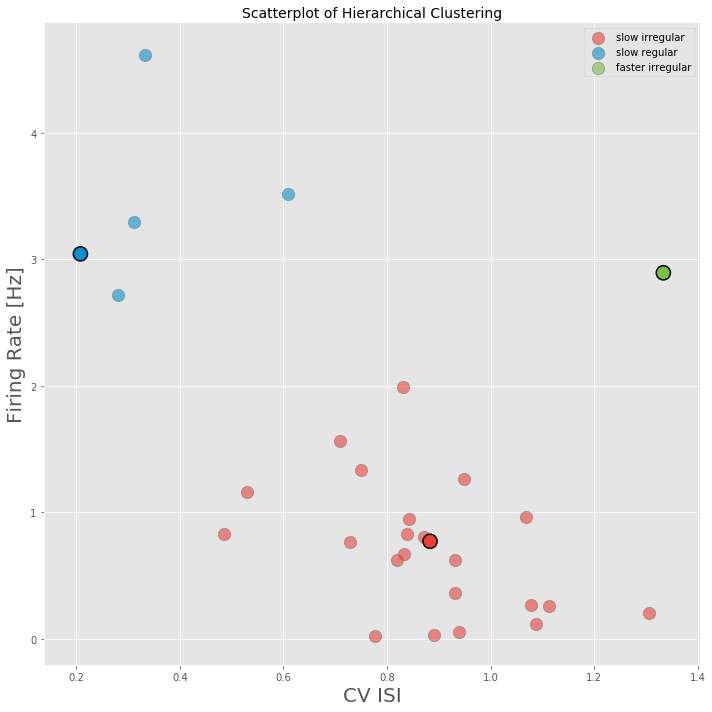

In [87]:
sns.lmplot(data=df, y='Firing Rate', x='CV ISI', fit_reg=False, legend= False, hue='clusters', scatter_kws={'linewidths':1,'edgecolor':'grey', 's':150, 'alpha':0.6}, size=(10),  palette=['#ee4035', '#0392cf', '#7bc043'])
plt.scatter(x=df_chosen_cluster['CV ISI'], y=df_chosen_cluster['Firing Rate'], c=df_chosen_cluster['colors'], alpha=1, s=200, edgecolors='k', linewidths=1.5)
plt.title('Scatterplot of Hierarchical Clustering', fontsize=14)
plt.xlabel('CV ISI', fontsize=20)
plt.ylabel('Firing Rate [Hz]', fontsize=20)
plt.legend(['slow irregular','slow regular', 'faster irregular'])
plt.tight_layout()
plt.savefig(os.sep.join([path, 'Clustered Scatterplot', 'Clustered Scatterplot.png']), dpi=300)

